## 1. Download: GPM IMERG Final Precipitation L3 1 month 0.1 degree x 0.1 degree V07 (GPM_3IMERGM)

1. Create an Earthdata account
2. Link <a href="https://disc.gsfc.nasa.gov/earthdata-login">GES DISC</a> with your account.
3. Verify by downloading this example data file URL
    Download the list of links

In [1]:
import csv
import numpy as np
import requests
import os
import xarray as xr
import netCDF4 as nc
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import cftime

from scipy.stats import pearsonr
import seaborn as sns

In [9]:
# Create .netrc, .dodsrc, .urs_cookies files

from subprocess import Popen
from getpass import getpass
import platform
import os
import shutil

urs = 'urs.earthdata.nasa.gov'    # Earthdata URL to call for authentication
prompts = ['Enter NASA Earthdata Login Username \n(or create an account at urs.earthdata.nasa.gov): ',
           'Enter NASA Earthdata Login Password: ']

homeDir = os.path.expanduser("~") + os.sep

with open(homeDir + '.netrc', 'w') as file:
    file.write('machine {} login {} password {}'.format(urs, getpass(prompt=prompts[0]), getpass(prompt=prompts[1])))
    file.close()
with open(homeDir + '.urs_cookies', 'w') as file:
    file.write('')
    file.close()
with open(homeDir + '.dodsrc', 'w') as file:
    file.write('HTTP.COOKIEJAR={}.urs_cookies\n'.format(homeDir))
    file.write('HTTP.NETRC={}.netrc'.format(homeDir))
    file.close()

print('Saved .netrc, .urs_cookies, and .dodsrc to:', homeDir)

# Set appropriate permissions for Linux/macOS
if platform.system() != "Windows":
    Popen('chmod og-rw ~/.netrc', shell=True)
else:
    # Copy dodsrc to working directory in Windows  
    shutil.copy2(homeDir + '.dodsrc', os.getcwd())
    print('Copied .dodsrc to:', os.getcwd())

Enter NASA Earthdata Login Username 
(or create an account at urs.earthdata.nasa.gov): ········
Enter NASA Earthdata Login Password: ········
Saved .netrc, .urs_cookies, and .dodsrc to: C:\Users\Carolina\
Copied .dodsrc to: C:\Users\Carolina\GPM_data\nc_pr


In [10]:
os.chdir(r"C:\Users\Carolina\GPM_data")

### 2. Download data

#### Download data for Bolivia

In [3]:
file = r"C:\Users\Carolina\GPM_data\subset_GPM_3IMERGM_07_20240328_140943_.txt"
urls = []
with open(file, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ')
    for row in spamreader:
        urls.append(row[0])
        filename = row[0]
        
# Filter data DJF
urls_pr=np.array(urls[2:])
urls_pr

array(['https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGM.07/2000/3B-MO.MS.MRG.3IMERG.20000601-S000000-E235959.06.V07B.HDF5.nc4?lat_bnds[659:819][0:1],precipitation[0:0][1080:1240][659:819],time_bnds[0:0][0:1],lon_bnds[1080:1240][0:1],lat[659:819],latv,time,lon[1080:1240],nv,lonv',
       'https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGM.07/2000/3B-MO.MS.MRG.3IMERG.20000701-S000000-E235959.07.V07B.HDF5.nc4?lat_bnds[659:819][0:1],precipitation[0:0][1080:1240][659:819],time_bnds[0:0][0:1],lon_bnds[1080:1240][0:1],lat[659:819],latv,time,lon[1080:1240],nv,lonv',
       'https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGM.07/2000/3B-MO.MS.MRG.3IMERG.20000801-S000000-E235959.08.V07B.HDF5.nc4?lat_bnds[659:819][0:1],precipitation[0:0][1080:1240][659:819],time_bnds[0:0][0:1],lon_bnds[1080:1240][0:1],lat[659:819],latv,time,lon[1080:1240],nv,lonv',
       'https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGM.07/2000/3B-MO.MS.MRG.3IMERG.20000901-

In [13]:
# Request and download data
output_path = r"C:\Users\Carolina\GPM_data\nc_pr"
os.chdir(output_path)

for url in urls_pr[138:]:
    filename= url.split("/")[-1][:28]
    result = requests.get(url)
    try:
        result.raise_for_status()
        f = open(f'{filename}.nc','wb')
        f.write(result.content)
        f.close()
        print('contents of URL written to '+filename)
    except:
        print('requests.get() returned an error code '+str(result.status_code))


contents of URL written to 3B-MO.MS.MRG.3IMERG.20111201
contents of URL written to 3B-MO.MS.MRG.3IMERG.20120101
contents of URL written to 3B-MO.MS.MRG.3IMERG.20120201
contents of URL written to 3B-MO.MS.MRG.3IMERG.20120301
contents of URL written to 3B-MO.MS.MRG.3IMERG.20120401
contents of URL written to 3B-MO.MS.MRG.3IMERG.20120501
contents of URL written to 3B-MO.MS.MRG.3IMERG.20120601
contents of URL written to 3B-MO.MS.MRG.3IMERG.20120701
contents of URL written to 3B-MO.MS.MRG.3IMERG.20120801
contents of URL written to 3B-MO.MS.MRG.3IMERG.20120901
contents of URL written to 3B-MO.MS.MRG.3IMERG.20121001
contents of URL written to 3B-MO.MS.MRG.3IMERG.20121101
contents of URL written to 3B-MO.MS.MRG.3IMERG.20121201
contents of URL written to 3B-MO.MS.MRG.3IMERG.20130101
contents of URL written to 3B-MO.MS.MRG.3IMERG.20130201
contents of URL written to 3B-MO.MS.MRG.3IMERG.20130301
contents of URL written to 3B-MO.MS.MRG.3IMERG.20130401
contents of URL written to 3B-MO.MS.MRG.3IMERG.2

## 2. Read Data

In [2]:
output_path = r"C:\Users\Carolina\GPM_data\nc_pr"
os.chdir(output_path)
file_paths = os.listdir()
file_paths

['3B-MO.MS.MRG.3IMERG.20000601.nc',
 '3B-MO.MS.MRG.3IMERG.20000701.nc',
 '3B-MO.MS.MRG.3IMERG.20000801.nc',
 '3B-MO.MS.MRG.3IMERG.20000901.nc',
 '3B-MO.MS.MRG.3IMERG.20001001.nc',
 '3B-MO.MS.MRG.3IMERG.20001101.nc',
 '3B-MO.MS.MRG.3IMERG.20001201.nc',
 '3B-MO.MS.MRG.3IMERG.20010101.nc',
 '3B-MO.MS.MRG.3IMERG.20010201.nc',
 '3B-MO.MS.MRG.3IMERG.20010301.nc',
 '3B-MO.MS.MRG.3IMERG.20010401.nc',
 '3B-MO.MS.MRG.3IMERG.20010501.nc',
 '3B-MO.MS.MRG.3IMERG.20010601.nc',
 '3B-MO.MS.MRG.3IMERG.20010701.nc',
 '3B-MO.MS.MRG.3IMERG.20010801.nc',
 '3B-MO.MS.MRG.3IMERG.20010901.nc',
 '3B-MO.MS.MRG.3IMERG.20011001.nc',
 '3B-MO.MS.MRG.3IMERG.20011101.nc',
 '3B-MO.MS.MRG.3IMERG.20011201.nc',
 '3B-MO.MS.MRG.3IMERG.20020101.nc',
 '3B-MO.MS.MRG.3IMERG.20020201.nc',
 '3B-MO.MS.MRG.3IMERG.20020301.nc',
 '3B-MO.MS.MRG.3IMERG.20020401.nc',
 '3B-MO.MS.MRG.3IMERG.20020501.nc',
 '3B-MO.MS.MRG.3IMERG.20020601.nc',
 '3B-MO.MS.MRG.3IMERG.20020701.nc',
 '3B-MO.MS.MRG.3IMERG.20020801.nc',
 '3B-MO.MS.MRG.3IMERG.200209

In [3]:
# Define the dimension to be used for aggregation
for file in file_paths:
    
    dataset = xr.open_mfdataset(file)
    
    agg_dim_name = 'time'

    # Set the dimension as an aggregation dimension
    dataset = dataset.assign_attrs(aggregation_dimension=agg_dim_name)

In [4]:
# Open each file and load it into an xarray dataset
datasets = [xr.open_dataset(file_path) for file_path in file_paths]

# Merge the datasets along a common dimension (e.g., time)
merged_dataset = xr.concat(datasets, dim="time")

# Convert unit from mm/hr to mm/month
day_month = pd.date_range('2000-06-30','2023-08-31', freq='M')
day_month = pd.to_datetime(day_month).day*24

for i in range(len(day_month)):
    merged_dataset['precipitation'][i] = merged_dataset['precipitation'][i]*day_month[i]

# Change units
merged_dataset.precipitation.attrs['units'] = 'mm'
merged_dataset.precipitation.attrs['Units'] = 'mm'
    
# Save the merged dataset to a new netCDF file
os.chdir(r"C:\Users\Carolina\GPM_data")
merged_dataset.to_netcdf("mon_pr_Bolivia_20000601_20230801.nc")

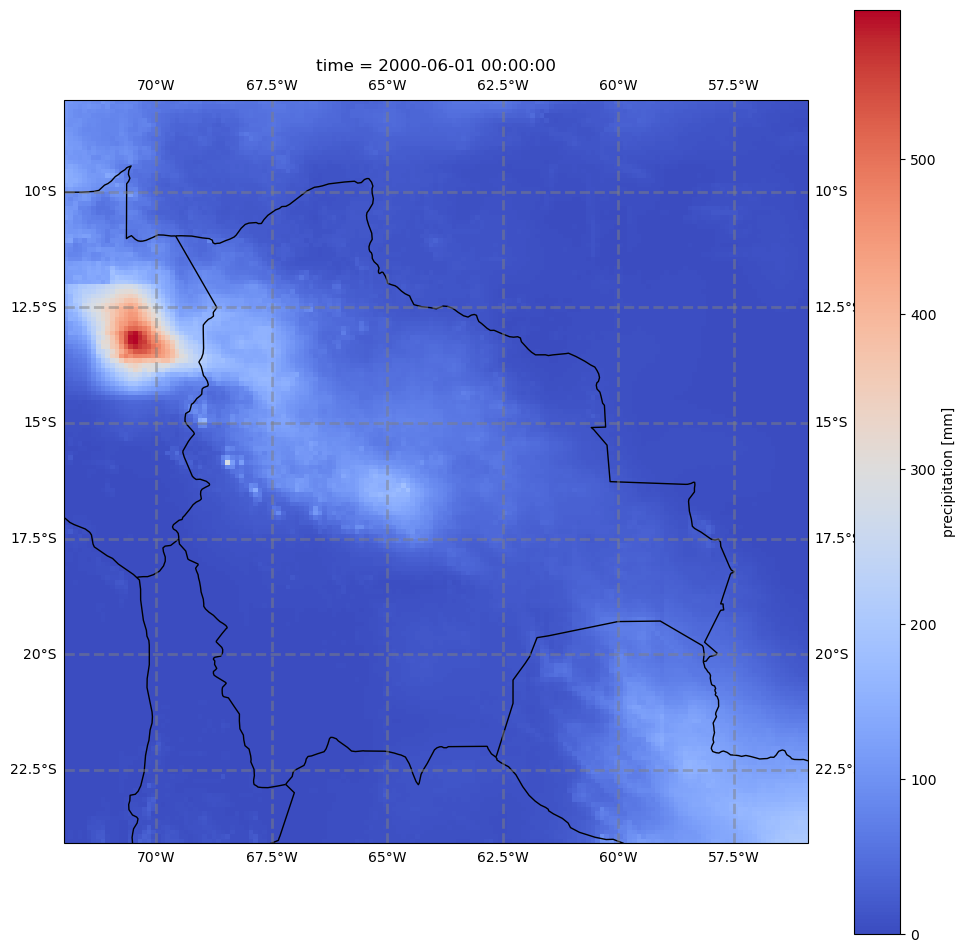

In [5]:
# PLOT NETCDF
fig = plt.figure(1, figsize=[12,12])

# PLOT
# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)



merged_dataset['precipitation'].isel(time=0).plot.pcolormesh(ax=ax, x="lon", y="lat",cmap='coolwarm')

ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

In [6]:
# Extract data from gauge locations

p1 = ['San_Calixto_IMERG', -68.132, -16.495]
p2 = ['CBBA_Aeropuerto_IMERG', -66.174, -17.416]
p3 = ["Viru_Viru_IMERG", -63.139, -17.649]
p4 = ["Santa_Cruz_SENAMHI_IMERG", -63.167, -17.783]

df_pr = pd.DataFrame(index= pd.date_range('2000-06-30', '2023-08-31',freq='M'))

locations = [p1, p2, p3, p4]

for target in locations:
    # Find the nearest latitude and longitude in the dataset
    nearest_lat = merged_dataset['lat'].sel(lat=target[2], method='nearest').values
    nearest_lon = merged_dataset['lon'].sel(lon=target[1], method='nearest').values

    # Extract data at the nearest latitude and longitude
    data_at_nearest_point = merged_dataset.sel(lat=nearest_lat, lon=nearest_lon, method='nearest')
    data_pr = np.array(data_at_nearest_point['precipitation'])
    df_pr[target[0]] = data_pr
    
# Resample by season DJF, MAM, JJA, SON
df_pr_mon = df_pr[6:].resample('3M', label='left', closed='left').sum()
df_pr_mon = df_pr_mon.iloc[:,]
index_mon = np.array(df_pr_mon.index.month)
djf = np.where(index_mon==12)
df_pr_mon_djf = df_pr_mon.iloc[djf[0],:]

In [7]:
# Observed station and aggregate data at station DJF
observed = r"D:\PROYECTOS\00_BHNB\Anexos\Precipitacion\PCP_Rell_1980_2020.csv"
observed_df = pd.read_csv(observed)
date = pd.date_range(observed_df.iloc[0,0], periods=len(observed_df), freq='D')
date = pd.to_datetime(date)
observed_df = observed_df.set_index(date)
stations = ['San_Calixto_OBS', 'CBBA_Aeropuerto_OBS', "Viru_Viru_OBS", "Santa_Cruz_SENAMHI_OBS"]

# Filter target stations
observed_df_filter = observed_df.loc['2000-12-01':,['BO2033','BO3035','BO7043','BO7146']]
observed_df_filter_mon = observed_df_filter.groupby([observed_df_filter.index.year, observed_df_filter.index.month]).sum()
date_mon = pd.date_range('2000-12-31', '2020-12-31', freq='M')
observed_df_filter_mon = observed_df_filter_mon.set_index(date_mon)

# 3M resample
observed_df_filter.columns = stations
observed_df_filter_gb = observed_df_filter_mon.resample('3M', label='left', closed='left').sum()
observed_df_filter_gb_total = observed_df_filter_gb.iloc[:]
index_mon = np.array(observed_df_filter_gb_total.index.month)
djf = np.where(index_mon==12)
observed_df_filter_gb_total_DJF = observed_df_filter_gb_total.iloc[djf[0],:]
observed_df_filter_gb_total_DJF.columns = stations

Text(110, 800, 'r=0.57, p=0.01')

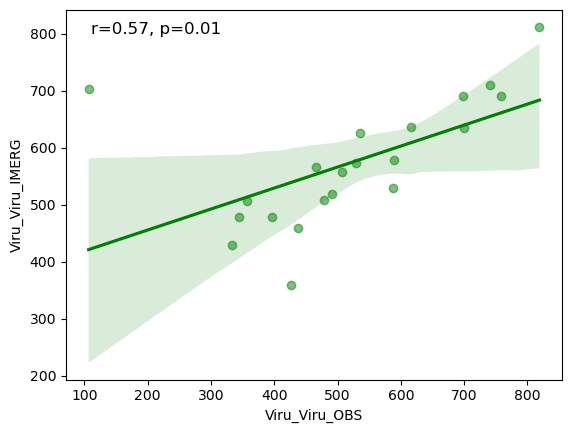

In [17]:
i=2
corr = pearsonr(observed_df_filter_gb_total_DJF.iloc[:21,i], df_pr_mon_djf.iloc[:21,i])
corr = [np.round(c, 2) for c in corr]
text = 'r=%s, p=%s' % (corr[0], corr[1])
ax.text(10, 300000, text, fontsize=12)

stations = ['San_Calixto_Obs', 'CBBA_Aeropuerto_Obs', "Viru_Viru_Obs", "Santa_Cruz_SENAMHI_Obs"]

ax = sns.regplot(x = observed_df_filter_gb_total_DJF.iloc[:21,i], 
                 y = df_pr_mon_djf.iloc[:21,i],
                 scatter_kws = {"color": "green", "alpha": 0.5},
                 line_kws    = {"color": "green"})
ax.text(110, 800, text, fontsize=12)

In [102]:
#Save data
observed_df_filter_gb_total_DJF.to_csv('DJF_observed_mon.csv')
df_pr_mon_djf.to_csv('DJF_IMERG_mon.csv')